In [1]:
import COVID19Py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy import stats

In [2]:
covid19 = COVID19Py.COVID19()

In [3]:
latest = covid19.getLatest()

In [4]:
print(latest)

{'confirmed': 304524, 'deaths': 12973, 'recovered': 91499}


In [5]:
location = covid19.getLocationByCountryCode("BR", timelines=True)

In [6]:
brazilDict = location[0]['timelines']['confirmed']['timeline']

In [7]:
dfBrazil = pd.DataFrame(brazilDict.items(), columns=['Date', 'Cases']).drop_duplicates(subset='Cases', keep="first")
dfJapan = pd.DataFrame(covid19.getLocationByCountryCode("JP", timelines=True)[0]['timelines']['confirmed']['timeline'].items(), columns=['Date', 'Cases']).drop_duplicates(subset='Cases', keep="first")
dfChina = pd.DataFrame(covid19.getLocationByCountryCode("CN", timelines=True)[0]['timelines']['confirmed']['timeline'].items(), columns=['Date', 'Cases']).drop_duplicates(subset='Cases', keep="first")
dfSouthKorea = pd.DataFrame(covid19.getLocationByCountryCode("KR", timelines=True)[0]['timelines']['confirmed']['timeline'].items(), columns=['Date', 'Cases']).drop_duplicates(subset='Cases', keep="first")

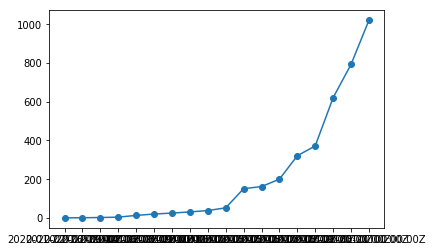

In [8]:
x = dfBrazil.Date
y = dfBrazil.Cases
plt.plot(x, y, '-o')
plt.show()

In [9]:
x = dfChina.Date
y = dfChina.Cases

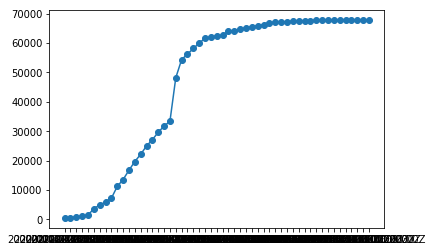

In [10]:
plt.plot(x, y, '-o')
plt.show()

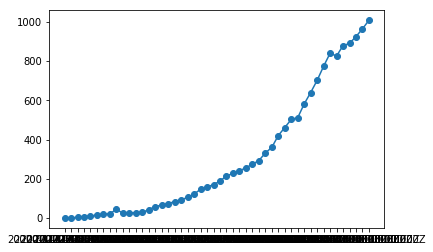

In [11]:
x = dfJapan.Date
y = dfJapan.Cases
plt.plot(x, y, '-o')
plt.show()

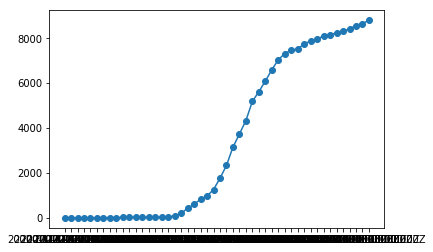

In [12]:
x = dfSouthKorea.Date
y = dfSouthKorea.Cases
plt.plot(x, y, '-o')
plt.show()

In [13]:
dfBrazil = dfBrazil.drop('Date', axis=1)
dfChina = dfChina.drop('Date', axis=1)
dfJapan = dfJapan.drop('Date', axis=1)
dfSouthKorea = dfSouthKorea.drop('Date', axis=1)

In [14]:
dfBrazil = dfBrazil[dfBrazil.Cases != 0]
dfChina = dfChina[dfChina.Cases != 0]
dfJapan = dfJapan[dfJapan.Cases != 0]
dfSouthKorea = dfSouthKorea[dfSouthKorea.Cases != 0]

dfBrazil = dfBrazil.reset_index(drop=True)
dfChina = dfChina.reset_index(drop=True)
dfJapan = dfJapan.reset_index(drop=True)
dfSouthKorea = dfSouthKorea.reset_index(drop=True)

In [15]:
def contagious_dataframe(df):
    contagious_list = []
    days = []
    for x in range(df.size):
        if (x+1) < df.size:
            cases_sub = df.iloc[(x+1)].Cases - df.iloc[x].Cases
            contagious_list.append(cases_sub)
            days.append(x+1)
    df = pd.DataFrame({"Days":days, "Contagious": contagious_list})
    df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    return df 



In [16]:
dfContagiousChina = contagious_dataframe(dfChina)

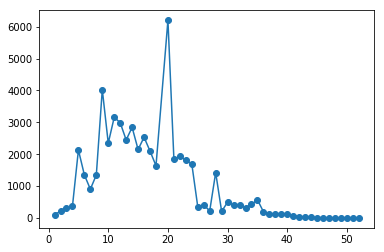

In [17]:
x = dfContagiousChina.Days
y = dfContagiousChina.Contagious
plt.plot(x, y, '-o')
plt.show()

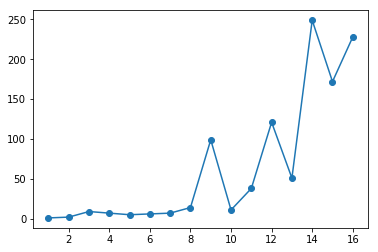

In [18]:
dfContagiousBrazil = contagious_dataframe(dfBrazil)
x = dfContagiousBrazil.Days
y = dfContagiousBrazil.Contagious
plt.plot(x, y, '-o')
plt.show()

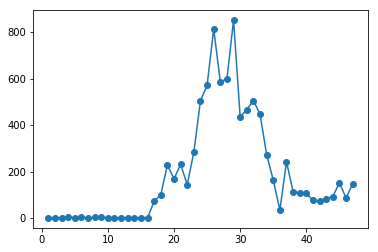

In [19]:
dfContagiousSouthKorea = contagious_dataframe(dfSouthKorea)
x = dfContagiousSouthKorea.Days
y = dfContagiousSouthKorea.Contagious
plt.plot(x, y, '-o')
plt.show()

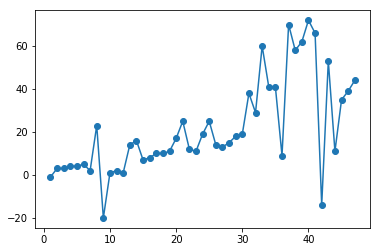

In [20]:
dfContagiousJapan = contagious_dataframe(dfJapan)
x = dfContagiousJapan.Days
y = dfContagiousJapan.Contagious
plt.plot(x, y, '-o')
plt.show()

In [21]:
def calc_stable_day(df):
    df = contagious_dataframe(df)
    
    percentualContagious = []
    stable_final_day = None
    flag_break_stable_day = 0
    
    for x in range(dfContagiousChina.shape[0]):
        percentual_day = (df.iloc[x].Contagious*100)/df.max().Contagious
        percentualContagious.append(percentual_day)
    
    for i in range(len(percentualContagious)):
        if int(percentualContagious[i]) == 100:
            flag_break_stable_day = flag_break_stable_day+1
        if flag_break_stable_day == 1 and int(percentualContagious[i]) == 0:
            flag_break_stable_day = flag_break_stable_day+1
        if flag_break_stable_day == 2:
            stable_final_day = i+1
            break
    
    
    return stable_final_day

In [22]:
print(calc_stable_day(dfChina))

41
